   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  
Null values in the dataset:
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


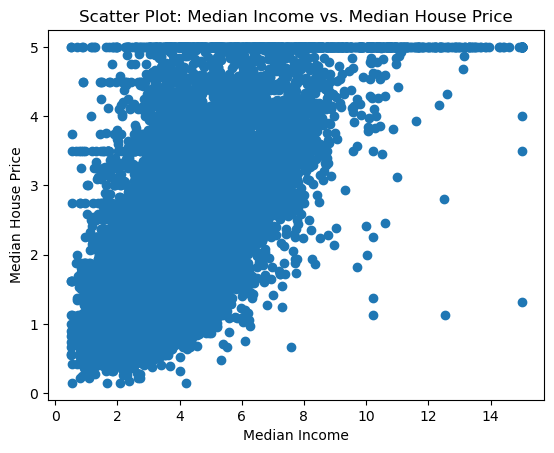

Covariance Matrix:
                MedInc     HouseAge    AveRooms  AveBedrms    Population  \
MedInc        3.609323    -2.846140    1.536568  -0.055858  1.040098e+01   
HouseAge     -2.846140   158.396260   -4.772882  -0.463718 -4.222271e+03   
AveRooms      1.536568    -4.772882    6.121533   0.993868 -2.023337e+02   
AveBedrms    -0.055858    -0.463718    0.993868   0.224592 -3.552723e+01   
Population   10.400979 -4222.270582 -202.333712 -35.527225  1.282470e+06   
AveOccup      0.370289     1.724298   -0.124689  -0.030424  8.217120e+02   
Latitude     -0.323860     0.300346    0.562235   0.070575 -2.631378e+02   
Longitude    -0.057765    -2.728244   -0.136518   0.012670  2.263778e+02   
MedHouseVal   1.508475     1.533988    0.433826  -0.025539 -3.221249e+01   

               AveOccup    Latitude   Longitude  MedHouseVal  
MedInc         0.370289   -0.323860   -0.057765     1.508475  
HouseAge       1.724298    0.300346   -2.728244     1.533988  
AveRooms      -0.124689    0.56

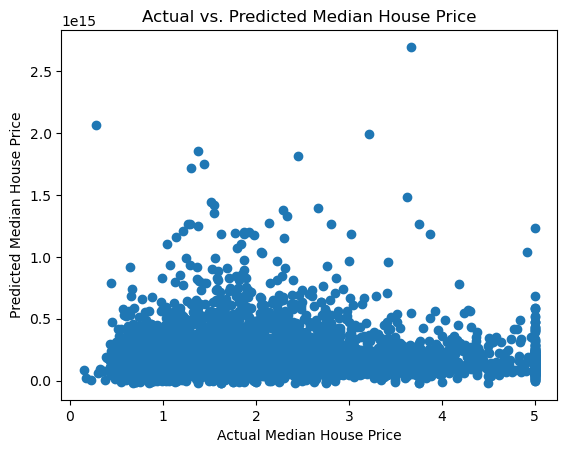

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Import the dataset
data = fetch_california_housing(as_frame=True)
df = pd.DataFrame(data.frame)

# Step 2: Display first 5 rows
print(df.head())

# Step 3: Number of samples in each class (not applicable for regression)

# Step 4: Check for null values
print("Null values in the dataset:")
print(df.isnull().sum())

# Step 5: Visualize the data (Scatter plot of target variable vs. feature)
plt.scatter(df['MedInc'], df['MedHouseVal'])
plt.xlabel('Median Income')
plt.ylabel('Median House Price')
plt.title('Scatter Plot: Median Income vs. Median House Price')
plt.show()

# Step 6: Obtain covariance and correlation values
cov_matrix = df.cov()
corr_matrix = df.corr()

print("Covariance Matrix:")
print(cov_matrix)

print("\nCorrelation Matrix:")
print(corr_matrix)

# Step 7: Split the data into training and testing sets
X = df.drop(columns=['MedHouseVal'])
y = df['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 8: Train the regression model using Stochastic Gradient Descent
model = SGDRegressor(max_iter=1000, alpha=0.0001, random_state=42)
model.fit(X_train, y_train)

# Step 9: Test the model
y_pred = model.predict(X_test)

# Step 10: Predict the accuracy and plot graph
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nMean Squared Error:", mse)
print("R-squared (Coefficient of Determination):", r2)

# Plot graph for predicted vs. actual values
plt.scatter(y_test, y_pred)

plt.xlabel('Actual Median House Price')
plt.ylabel('Predicted Median House Price')
plt.title('Actual vs. Predicted Median House Price')
plt.show()